In [2]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
titanic_df = pd.read_csv(r'C:\Titanic\train.csv')
test_df = pd.read_csv(r'C:\Titanic\test.csv')


In [4]:
#Arquivos 

conjunto_df = [titanic_df,test_df]
conjunto_Data = pd.concat(conjunto_df,axis=0,sort=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('Data treino -->',titanic_df.shape)
print('-'*58)
print('Data teste -->',test_df.shape)

Data treino --> (891, 12)
----------------------------------------------------------
Data teste --> (418, 11)


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
#Visualização dos dados/ maior morte masculina 
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

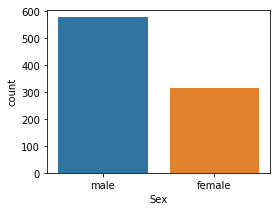

In [10]:
#Visualizaçao em gráfico
plt.figure(figsize=(4,3))
sns.countplot(data=titanic_df,x='Sex')

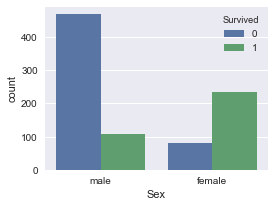

In [11]:
plt.figure(figsize=(4,3))
plt.style.use('seaborn')
sns.countplot(data=titanic_df,x='Sex',hue='Survived')

In [12]:
#Transformando isso em média
sobreviventes = titanic_df['Survived'].groupby(titanic_df['Sex']).value_counts().unstack()

In [13]:
 #Conclusão: A taxa de sobrevivencia masculina é menor, a maioria das mulheres sobreviveram.

In [14]:
#Trabalhando com as classes 

#Checar valores nulos
sum(titanic_df['Pclass'].isnull())

0

In [15]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

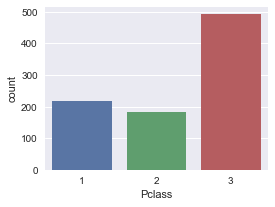

In [16]:
plt.figure(figsize=(4,3))
plt.style.use('seaborn')
sns.countplot(data=titanic_df,x='Pclass')
#A classe que mais tinha gente era a terceira classe

In [17]:
#sexo das pessoas em relação com sua classe

titanic_df['Sex'].groupby(titanic_df['Pclass']).value_counts().unstack()

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


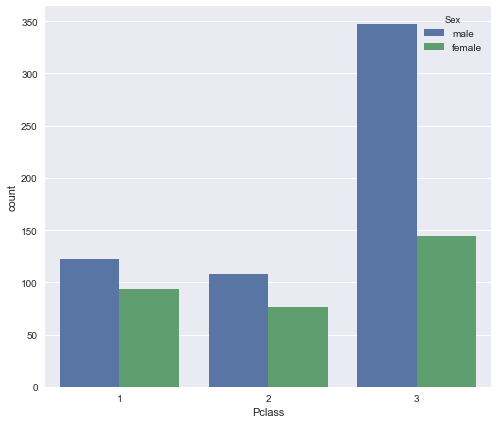

In [18]:
#Visualizando os dados da classe
plt.style.use('seaborn')
plt.figure(figsize=(8,7))
sns.countplot(data=titanic_df,x='Pclass',hue='Sex')

In [19]:

#Transformar isso em porcentagem // Homens em cada classe
(titanic_df['Sex'].groupby(titanic_df['Pclass']).value_counts().unstack()['male']/titanic_df['Pclass'].value_counts()[3]) *100

Pclass
1    24.847251
2    21.995927
3    70.672098
Name: male, dtype: float64

In [20]:
#Porcentagem de mulheres em cada classe
(titanic_df['Sex'].groupby(titanic_df['Pclass']).value_counts().unstack()['female']/titanic_df['Pclass'].value_counts()[3]) *100

Pclass
1    19.144603
2    15.478615
3    29.327902
Name: female, dtype: float64

In [21]:
#Conclusões: A maioria dos passageiros estava na 3 classe. Em todas as classes há uma quantidade maior de homens. 


In [22]:
#Idade

In [23]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
#Checar valores nulos
sum(titanic_df['Age'].isnull()) 

177

In [25]:
# Numero de valores nulos no arquivo test
sum(test_df['Age'].isnull())

86

In [26]:
#valores nulos nos arquivos //
#Relembrando que tem recém-nascidos no navio, já que o minimo de idade mostrado foi 0.4. Logo, fiquei curioso em saber quanto estavam lá
titanic_df[titanic_df['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [27]:
#separando por idade
len(titanic_df[titanic_df['Age']<=16])

100

In [28]:
#limpeza dos valores null
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
for df in conjunto_df:
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.',expand=True)

In [30]:
titanic_df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [31]:
titanic_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Jonkheer      1
Mme           1
Lady          1
Countess      1
Sir           1
Don           1
Capt          1
Name: Title, dtype: int64

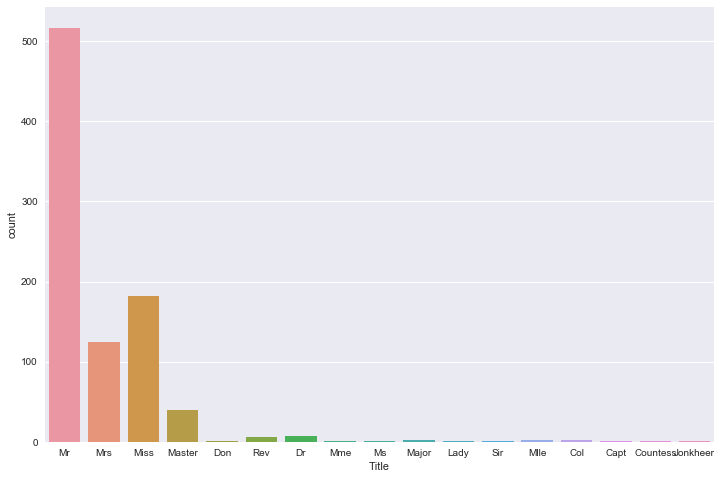

In [32]:
#visualizando em gráfico
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
sns.countplot(data=titanic_df,x='Title')



In [33]:
#Atribuir um numero para cada classificação do array 
title_map = {'Mr':1, 'Miss':2, 'Mrs' :3, 'Master':4, "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4, "Countess": 4, "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4, "Capt": 4, "Sir":4
            }

In [1]:
for df in conjunto_df:
    df['Title'] = df['Title'].map(title_map)

NameError: name 'conjunto_df' is not defined

In [35]:
#media de idade em cada grupo
titanic_df[['Title','Age']].groupby('Title').mean()

,Age
Title,
1,32.368090
2,21.773973
3,35.898148
4,20.430161


In [36]:
#Criando função 
def compute_idade(dataframe):
    Age = dataframe['Age']
    Title = dataframe['Title']
    
    if pd.isnull(Age):
        if Title == 1:
            return titanic_df['Age'][titanic_df['Title']==1].mean()
        if Title == 2:
            return titanic_df['Age'][titanic_df['Title']==2].mean()
        if Title == 3:
            return titanic_df['Age'][titanic_df['Title']==3].mean()
        if Title == 4:
            return titanic_df['Age'][titanic_df['Title']==4].mean()
        
    else:
        return Age

In [37]:
for df in conjunto_df:
    df['Age'] = df[['Age','Title']].apply(compute_idade,axis=1)

In [38]:
sum(titanic_df['Age'].isnull()),sum(test_df['Age'].isnull())

(0, 0)

C:\Users\RicardoRamos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


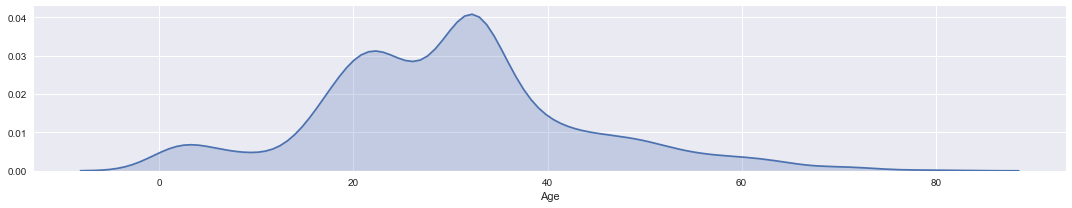

In [39]:
#Visualizando os dados 
g=sns.FacetGrid(data=titanic_df,aspect=5)
plt.style.use('seaborn')
g.map(sns.kdeplot,'Age',shade=True)

In [40]:
#Função
def Idade_grupo(age):
    if age <=16:
        return 1
    if (age > 16) & (age <=26):
        return 2
    if (age > 26) & (age <=36):
        return 3 
    if (age > 36) & (age <=46):
        return 4
    if (age > 46) & (age <=56):
        return 5
    if age > 56:
        return 6

In [41]:
for df in conjunto_df:
    df['Age_group'] = df['Age'].apply(Idade_grupo)

In [42]:
titanic_df['Age_group'].value_counts()

3    336
2    260
1    100
4     97
5     63
6     35
Name: Age_group, dtype: int64

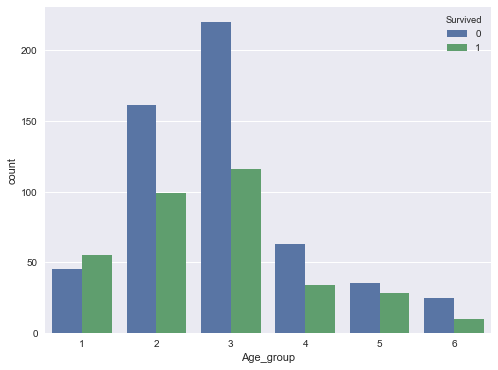

In [43]:
#Visualizando dados
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
sns.countplot(data=titanic_df,x='Age_group',hue='Survived')

In [44]:
#numero de sobreviventes de por idade 
sobrevivente_num = titanic_df[titanic_df['Survived']==1]['Age_group'].value_counts()
mortos_num = titanic_df[titanic_df['Survived']==0]['Age_group'].value_counts()

sobrevivente_num,mortos_num

(3    116
 2     99
 1     55
 4     34
 5     28
 6     10
 Name: Age_group, dtype: int64, 3    220
 2    161
 4     63
 1     45
 5     35
 6     25
 Name: Age_group, dtype: int64)

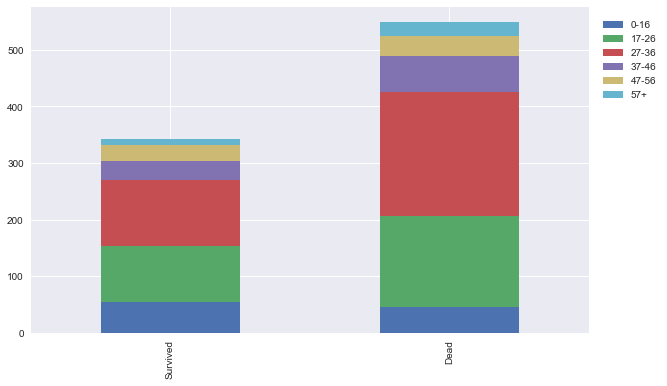

In [45]:
#Visualizando 
plt.style.use('seaborn')
stacked_df = pd.DataFrame([sobrevivente_num,mortos_num])

stacked_df.index = ['Survived','Dead']
stacked_df.columns = ['0-16','17-26','27-36','37-46','47-56','57+']

stacked_df.plot(kind='bar',stacked=True,figsize=(10,6))

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)

In [46]:
#Conclusão: houve um numero maior de mortos. As pessoas entre 27-36 foram as mais afetadas no acidente


In [47]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3


In [48]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Age_group        0
dtype: int64

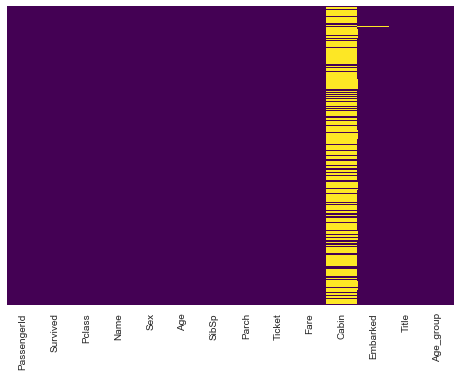

In [49]:
#Visualizando os dados
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

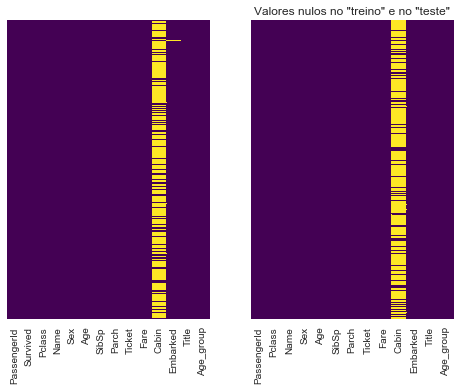

In [50]:
fig,ax = plt.subplots(1,2)

plt.title('Valores nulos no "treino" e no "teste"')

sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[0])
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax[1])

In [51]:
print('Dados Treino -->',titanic_df.shape)
print('-'*58)
print('Dados Teste -->',test_df.shape)

Dados Treino --> (891, 14)
----------------------------------------------------------
Dados Teste --> (418, 13)


In [52]:
#trabalhando com fare - checando os valores nulos e a descrição da tarifa no "treino" e "teste" 
for df in conjunto_df:
    print(sum(df['Fare'].isna()))
    print('--'*25)
    print(df['Fare'].describe())

0
--------------------------------------------------
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
1
--------------------------------------------------
count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64


In [53]:
#Como tarifa e classe são ligados, cobrir os valores nulo das tarifas com a média das classes.
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,1,6


In [54]:
#Calcular media e mudar o 
#conjunto_Data é o "treino" e o "teste" concatenados
test_df['Fare']  = test_df['Fare'].fillna(conjunto_Data['Fare'][conjunto_Data['Pclass'] == 3].mean())

In [55]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group


In [56]:
#Valores nulos no Fare
sum(titanic_df['Fare'].isnull())

0

In [57]:
def fare_class(Fare):
    if Fare < 10 :
        return 1
    if (Fare >= 10)& (Fare < 30):
        return 2
    if (Fare >= 30) & (Fare < 70):
        return 3
    if (Fare >= 70):
        return 4

In [58]:
for df in conjunto_df:
    df['Fare_group'] = df['Fare'].apply(fare_class)

In [59]:
#Trabalhando com a cabine

#Checando valores nulos
for df in conjunto_df:
    print('Valores nulos  ---> ' + str(sum(df['Cabin'].isna())))
    print('Sample data\n')
    print(df['Cabin'].tail())
    print('--'*54)

Valores nulos  ---> 687
Sample data

886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, dtype: object
------------------------------------------------------------------------------------------------------------
Valores nulos  ---> 327
Sample data

413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, dtype: object
------------------------------------------------------------------------------------------------------------


In [60]:
#Separando o nome das cabines do Cabin_Name 
for df in conjunto_df:
    df['Cabin_Name'] = df['Cabin'].str.extract(r'([A-Za-z])')

In [61]:
for df in conjunto_df:
    print(df['Cabin_Name'].tail())
    print('--'*54)

886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Name, dtype: object
------------------------------------------------------------------------------------------------------------
413    NaN
414      C
415    NaN
416    NaN
417    NaN
Name: Cabin_Name, dtype: object
------------------------------------------------------------------------------------------------------------


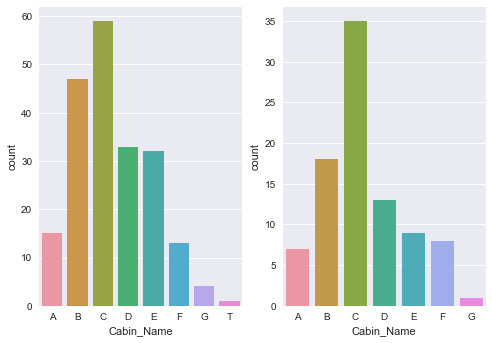

In [62]:
fig,ax = plt.subplots(nrows=1,ncols=2)

sns.countplot(titanic_df['Cabin_Name'].sort_values(ascending=True),ax=ax[0])
sns.countplot(test_df['Cabin_Name'].sort_values(ascending=True),ax=ax[1])

In [63]:
cabine_dict = { 'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8}

In [64]:
for df in conjunto_df:
    df['Cabin_Number'] = df['Cabin_Name'].map(cabine_dict)

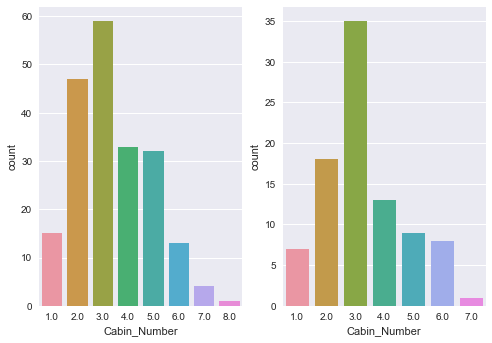

In [65]:
fig,ax = plt.subplots(nrows=1,ncols=2)

sns.countplot(titanic_df['Cabin_Number'].sort_values(ascending=True),ax=ax[0])
sns.countplot(test_df['Cabin_Number'].sort_values(ascending=True),ax=ax[1])

In [66]:
titanic_df['Cabin_Name'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [67]:
for df in conjunto_df:
    df.loc[df['Cabin_Number'].isna(),'Cabin_Number'] = 0
    df.loc[df['Cabin_Number'].isna(),'Cabin_Number'] = 0

In [68]:
#Trabalhando com embarque
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Fare_group,Cabin_Name,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,1,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,4,4,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,1,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,3,3,C,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,3,1,NaN,0.0


In [69]:
#Transformar homem e mulher em binário
genero_dict = {'male' :1,'female':0}

In [70]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [71]:
#Checar valores nulos
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Fare_group,Cabin_Name,Cabin_Number
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2,4,4,B,2.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,3,6,4,B,2.0


In [72]:
titanic_df.groupby([titanic_df['Embarked']]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Age_group,Fare_group,Cabin_Number
Embarked,,,,,,,,,,,
C,445.357143,0.553571,1.886905,30.952868,0.386905,0.363095,59.954144,1.845238,2.940476,2.565476,1.172619
Q,417.896104,0.389610,2.909091,27.693530,0.428571,0.168831,13.276030,1.740260,2.597403,1.350649,0.220779
S,449.527950,0.336957,2.350932,29.690639,0.571429,0.413043,27.079812,1.669255,2.852484,1.937888,0.736025


In [73]:
#Transformando embarked em int
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('C')

In [74]:
embarque_dict = {'S':1,'C':2,'Q':3}

In [75]:
for df in conjunto_df:
    df['Embarked'] = df['Embarked'].map(embarque_dict)
    df['Sex'] = df['Sex'].map(genero_dict)

In [76]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group,Fare_group,Cabin_Name,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1,2,1,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,3,4,4,C,3.0


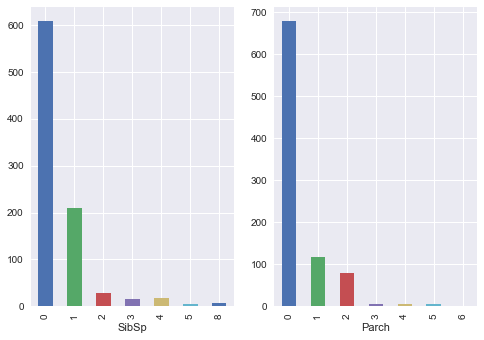

In [77]:
#Trabalhando com alone feature

plt.style.use('seaborn')
fig,ax = plt.subplots(nrows=1,ncols=2)


titanic_df['PassengerId'].groupby(titanic_df['SibSp']).count().plot(kind='bar',ax=ax[0])
titanic_df['PassengerId'].groupby(titanic_df['Parch']).count().plot(kind='bar',ax=ax[1])

In [78]:
def isAlone(cols):
    Parch = cols[0]
    SibSp = cols[1]
    
    if (Parch == 0) & (SibSp == 0):
        return 1
    else:
        return 0

In [79]:
titanic_df['Alone'] = titanic_df[['Parch','SibSp']].apply(isAlone,axis=1)

In [80]:
#Regressão Logistica

X = titanic_df[['Pclass','Age_group','Alone','SibSp','Parch','Fare_group','Age_group','Cabin_Number',
                   'Sex','Embarked']]
y = titanic_df['Survived']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

C:\Users\RicardoRamos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
log_model_Predict = log_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print('Matrix C\n',confusion_matrix(y_test,log_model_Predict))
print('\n')
print('Retorno de classificacão \n',classification_report(y_test,log_model_Predict))

Matrix C
 [[136  18]
 [ 37  77]]


Retorno de classificacão 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.81      0.68      0.74       114

   micro avg       0.79      0.79      0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [84]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)       
knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [85]:
knn_predict = knn.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_test,knn_predict))
print('\n')
print('Classsification Report \n',classification_report(y_test,knn_predict))



Confusion Matrix 
 [[134  20]
 [ 26  88]]


Classsification Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       154
           1       0.81      0.77      0.79       114

   micro avg       0.83      0.83      0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [91]:
error_rate = []

for k in range(1,40):
    
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train,y_train)
    knn_predict_k = knn_k.predict(X_test)
    
    error_rate.append(np.mean(y_test != knn_predict_k))
    

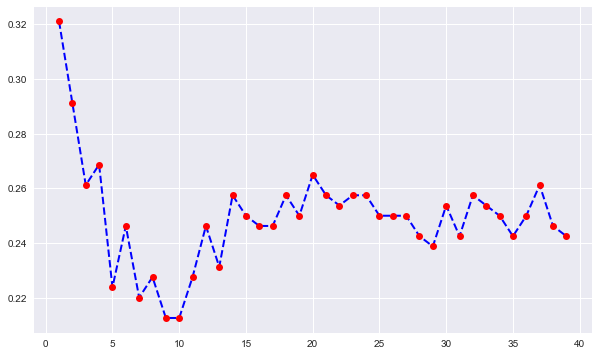

In [92]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='dashed',lw=2,marker='o',markerfacecolor='red')